<a href="https://colab.research.google.com/github/LaurentTits/AI_execices/blob/main/2022_10_16_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi
!rm -rf sample_data

Sun Oct 16 20:57:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    33W /  70W |   1410MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

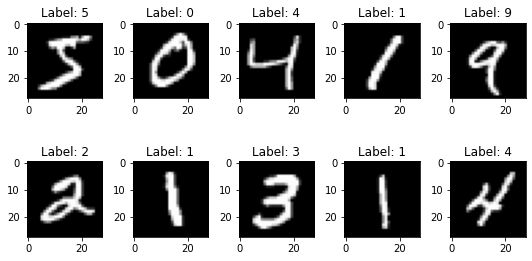

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils

import numpy as np
np.random.seed(2017) #set the seed

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
%matplotlib inline

num = 10
images = x_train[:num]
labels = y_train[:num]
num_row = 2
num_col = 5
#plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num):
  ax = axes[i//num_col, i%num_col]
  ax.imshow(images[i], cmap='gray')
  ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()


In [ ]:
#Learning Params
batch_size = 16
nb_classes = 10
nb_epochs = 4

#input image dimensions
img_rows, img_cols = 28,28
# number of convolutional filters to use
nb_filters = 32
#size of pooling area for max pooling
pool_size = (2,2)
# convolution kernel size
kernel_size = (3, 3)


In [ ]:
#reshape data

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train.shape
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#one hot encoding : exp convert 5 class label to (0,0,0,0,0,1,0,0,0,0)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
#define architecture

model = Sequential()
model.add(Conv2D(nb_filters, kernel_size, padding='valid', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))




In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = batch_size, validation_split=0.2, epochs=nb_epochs)

Epoch 1/4
3000/3000 [==============================] - 12s 4ms/step - loss: 0.3322 - accuracy: 0.9013 - val_loss: 0.1631 - val_accuracy: 0.9505
Epoch 2/4
3000/3000 [==============================] - 12s 4ms/step - loss: 0.1382 - accuracy: 0.9580 - val_loss: 0.1157 - val_accuracy: 0.9666
Epoch 3/4
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0945 - accuracy: 0.9700 - val_loss: 0.0895 - val_accuracy: 0.9726
Epoch 4/4
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0702 - accuracy: 0.9784 - val_loss: 0.0820 - val_accuracy: 0.9734


In [ ]:
score=model.evaluate(x_test, y_test)
print('Test Accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0767 - accuracy: 0.9744
Test Accuracy: 0.974399983882904


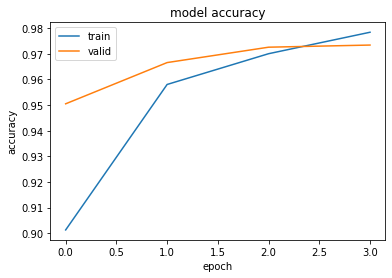

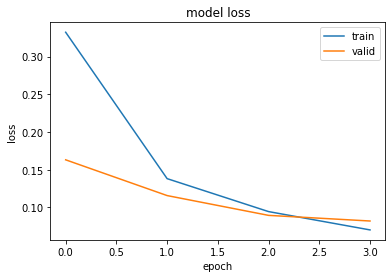

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

plt.show()

In [ ]:
#define architecture

model = Sequential()
model.add(Conv2D(nb_filters, kernel_size, padding='valid', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Conv2D(nb_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Conv2D(nb_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = batch_size, validation_split=0.2, epochs=nb_epochs)

score=model.evaluate(x_test, y_test)
print('Test Accuracy:', score[1])

Epoch 1/4
3000/3000 [==============================] - 14s 4ms/step - loss: 0.6580 - accuracy: 0.7903 - val_loss: 0.1509 - val_accuracy: 0.9521
Epoch 2/4
3000/3000 [==============================] - 12s 4ms/step - loss: 0.1450 - accuracy: 0.9559 - val_loss: 0.1090 - val_accuracy: 0.9663
Epoch 3/4
3000/3000 [==============================] - 13s 4ms/step - loss: 0.1013 - accuracy: 0.9682 - val_loss: 0.0966 - val_accuracy: 0.9720
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.9705
Test Accuracy: 0.9704999923706055


Saving 1.jpg to 1.jpg


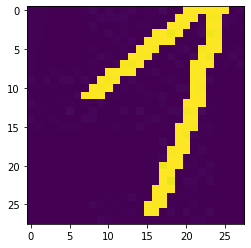

In [ ]:
import cv2
import os
from google.colab import files
from matplotlib import pyplot as plt
from IPython.display import Image
from IPython.display import HTML
from base64 import b64encode
import numpy as np
import glob
import imageio
import numpy as np
import matplotlib.pyplot as plt
import math

files.upload()

img_uploaded = cv2.imread('1.jpg', 0)
plt.imshow(img_uploaded)

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

img_array = image.img_to_array(img_uploaded)
img_batch = np.expand_dims(img_array, axis=0)

img_batch = img_batch.astype('float32')/255

prediction = model.predict(img_batch)

print(prediction)

1/1 [==============================] - 0s 16ms/step
[[4.89258615e-04 8.66440475e-01 1.12983910e-02 5.99398627e-04
  5.00619486e-02 4.55047749e-03 9.17333068e-07 5.63391559e-02
  1.19894874e-04 1.01000667e-02]]
